## First attempt at making probes

We made our own probes to install below the canyons, with only the electrodes stciking out near the canyon head. For that we used much shorter shafts (about 1.5 in vs 30 cm). We did not use the same brand of cables as Paolo and our cables didn't have a wire coating that is supposed to be grounding the probe... maybe that is a problem. Our electrodes are a bit longer and they seem less "golden" than the ones on the original probes. 

![first probes](probes_01.jpg)

I tried connecting all 4 probes --37 and 38 which are the original ones, and A and K which are the lab-made ones-- at the same time and measuring from the same container. I used the standards (1000, 10000, 100000 $\mu$Siemens) and always rinsed with tap water.

NOTE: By the way, there is a blue sponge dedidated just to cleaning the probes on the conduino box.

File variables:

|variable name| type and shape|
|::|::|
|'ch1':| float, array(nsamples)|
|'ch2': |float, array(nsamples)|
|'ch3': |float, array(nsamples)|
|'ch4': |float, array(nsamples)|
|'dt': |float, scalar|
|'macORpc': |str ('mac')|
|'nSample': |float, scalar|
|'nSamples': |float, scalar|
|'portNumber':| int, scalar|
|'pp':| float, array, not sure what it has|
|'time':| float, array(nsamples)|
|'timeElapsed':| float,scalar|

In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### $10^3$ $\mu$Siemens

../labprobes_31jan19/4_probes_10000muSi.mat
Probe 37, mean reading=0.445975
Probe 38, mean reading=0.424248
Probe A, mean reading=0.571234
Probe K, mean reading=0.968220


Text(0.5,0,'time / s')

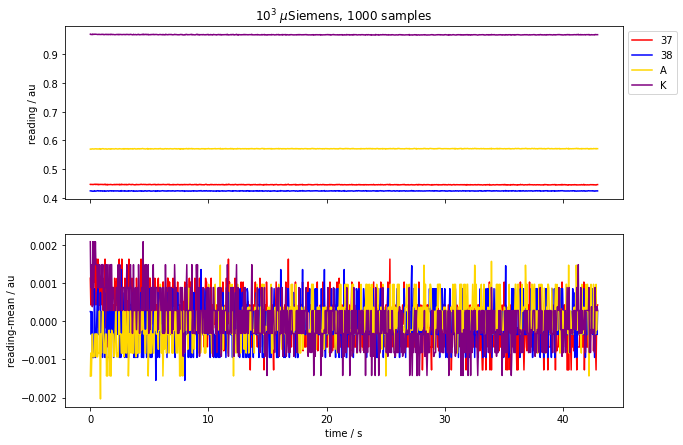

In [3]:
colors = ['red','blue','gold','purple',]
labels = np.array(['37', '38', 'A','K'])

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(10,7), sharex=True)

file = '../labprobes_31jan19/4_probes_10000muSi.mat'

print(file)
mat = sio.loadmat(file, squeeze_me=True)
p37 = mat['ch1']
pK = mat['ch2']
p38 = mat['ch3']
pA = mat['ch4']
    
    
time = mat['time']
nsamples = mat['nSamples']

for probe, col, lab in zip([p37, p38, pA, pK], colors, labels):
    ax0.plot(time,probe, color=col, label=lab)
    ax1.plot(time,probe-np.mean(probe), color=col, label=lab)
    print('Probe %s, mean reading=%f' %(lab,np.mean(probe)) )

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax1.set_ylabel('reading-mean / au')
ax0.set_title('$10^3$ $\mu$Siemens, 1000 samples')
ax1.set_xlabel('time / s')

### $10^4$ $\mu$Siemens

../labprobes_31jan19/4_probes_100000muSi.mat
Probe 37, mean reading=2.544772
Probe 38, mean reading=2.232200
Probe A, mean reading=3.993222
Probe K, mean reading=5.295375


Text(0.5,0,'time / s')

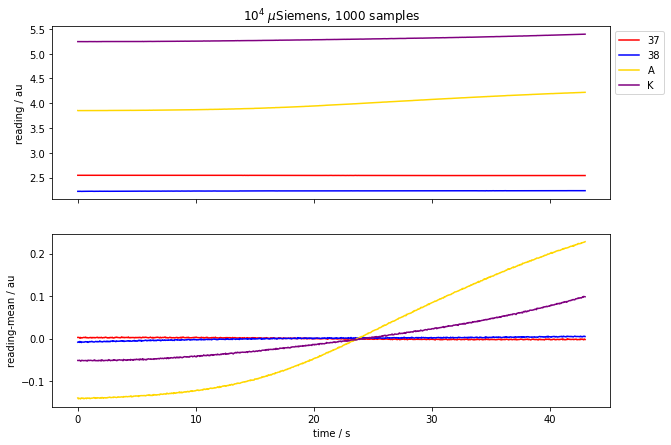

In [4]:
colors = ['red','blue','gold','purple',]
labels = np.array(['37', '38', 'A','K'])

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(10,7), sharex=True)

file = '../labprobes_31jan19/4_probes_100000muSi.mat'

print(file)
mat = sio.loadmat(file, squeeze_me=True)
p37 = mat['ch1']
pK = mat['ch2']
p38 = mat['ch3']
pA = mat['ch4']
    
    
time = mat['time']
nsamples = mat['nSamples']

for probe, col, lab in zip([p37, p38, pA, pK], colors, labels):
    ax0.plot(time,probe, color=col, label=lab)
    ax1.plot(time,probe-np.mean(probe), color=col, label=lab)
    print('Probe %s, mean reading=%f' %(lab,np.mean(probe)) )

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax1.set_ylabel('reading-mean / au')
ax0.set_title('$10^4$ $\mu$Siemens, 1000 samples')
ax1.set_xlabel('time / s')

### Longer sampling time

../labprobes_31jan19/4_probes_100000muSi_10000samp_CH1A_CH2K_CH338_CH437.mat
Probe 37, mean reading=2.451994
Probe 38, mean reading=2.462432
Probe A, mean reading=4.206768
Probe K, mean reading=5.543770


Text(0.5,0,'time / s')

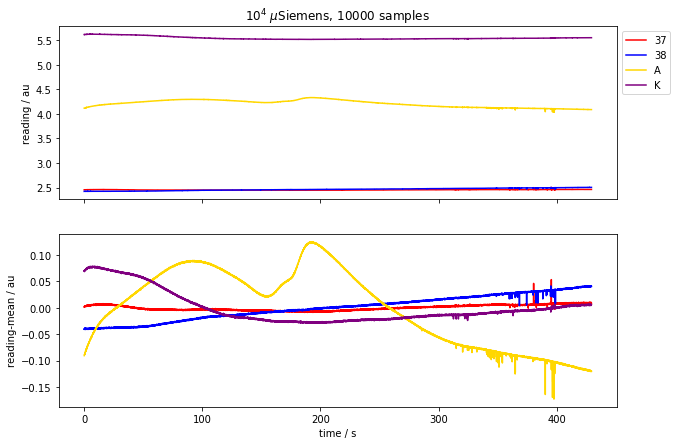

In [5]:
colors = ['red','blue','gold','purple',]
labels = np.array(['37', '38', 'A','K'])

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(10,7), sharex=True)

file = '../labprobes_31jan19/4_probes_100000muSi_10000samp_CH1A_CH2K_CH338_CH437.mat'

print(file)
mat = sio.loadmat(file, squeeze_me=True)
p37 = mat['ch4']
pK = mat['ch2']
p38 = mat['ch3']
pA = mat['ch1']
    
    
time = mat['time']
nsamples = mat['nSamples']

for probe, col, lab in zip([p37, p38, pA, pK], colors, labels):
    ax0.plot(time,probe, color=col, label=lab)
    ax1.plot(time,probe-np.mean(probe), color=col, label=lab)
    print('Probe %s, mean reading=%f' %(lab,np.mean(probe)) )

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax1.set_ylabel('reading-mean / au')
ax0.set_title('$10^4$ $\mu$Siemens, 10000 samples')
ax1.set_xlabel('time / s')

**Conclusions**
* Lab-made probes measure higher values (in AU) than Paolo's probes. Up to 2 times higher. 
* Probes 37 ad 38 don't have the same baseline value (At 10^3 \muSiemens, the difference is about 0.02)
* All probes drift with time
    - For sampling time longer than 150 s, 38 and K drift about the same amount, 37 is the most stable and A is a mess, but when I repeated the 1000 sample measurements it stabilized.
* They seem to have similar amount of noise as shown in the first plot (probe-mean) for small conductivities.


### Longer timeseries, trimmed probe K

I trimmed the electrodes in probe K to be about 3mm like in the original ones. Not much difference.

../labprobes_31jan19/4_probes_100000muSi_10000samp01_CH137_CH2K_CH338_CH4A.mat
Probe 37, mean reading=2.857002
Probe 38, mean reading=2.664639
Probe A, mean reading=4.087433
Probe K, mean reading=3.334881
../labprobes_31jan19/4_probes_100000muSi_10000samp02_CH137_CH2K_CH338_CH4A.mat
Probe 37, mean reading=2.803034
Probe 38, mean reading=2.606035
Probe A, mean reading=4.016588
Probe K, mean reading=3.310187
../labprobes_31jan19/4_probes_100000muSi_10000samp03_CH137_CH2K_CH338_CH4A.mat
Probe 37, mean reading=2.780288
Probe 38, mean reading=2.608703
Probe A, mean reading=3.965066
Probe K, mean reading=3.292478


Text(0.5,0,'time / s')

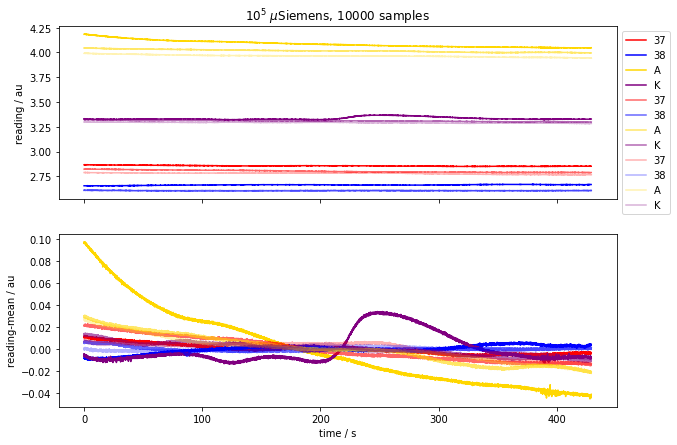

In [6]:
colors = ['red','blue','gold','purple',]
labels = np.array(['37', '38', 'A','K'])

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(10,7), sharex=True)

files = ['../labprobes_31jan19/4_probes_100000muSi_10000samp01_CH137_CH2K_CH338_CH4A.mat',
         '../labprobes_31jan19/4_probes_100000muSi_10000samp02_CH137_CH2K_CH338_CH4A.mat',
         '../labprobes_31jan19/4_probes_100000muSi_10000samp03_CH137_CH2K_CH338_CH4A.mat',
]

alphas = [1, 0.6, 0.3]
for file, alpha in zip(files,alphas):
    print(file)
    mat = sio.loadmat(file, squeeze_me=True)
    p37 = mat['ch1']
    pK = mat['ch2']
    p38 = mat['ch3']
    pA = mat['ch4']


    time = mat['time']
    nsamples = mat['nSamples']

    for probe, col, lab in zip([p37, p38, pA, pK], colors, labels):
        ax0.plot(time,probe, color=col, label=lab, alpha=alpha)
        ax1.plot(time,probe-np.mean(probe), color=col, label=lab, alpha=alpha)
        print('Probe %s, mean reading=%f' %(lab,np.mean(probe)) )

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax1.set_ylabel('reading-mean / au')
ax0.set_title('$10^5$ $\mu$Siemens, 10000 samples')
ax1.set_xlabel('time / s')

../labprobes_31jan19/4_probes_10000muSi_10000samp01_CH137_CH2K_CH338_CH4A.mat
Probe 37, mean reading=0.483107
Probe 38, mean reading=0.452941
Probe A, mean reading=0.618078
Probe K, mean reading=0.629843
../labprobes_31jan19/4_probes_10000muSi_10000samp02_CH137_CH2K_CH338_CH4A.mat
Probe 37, mean reading=0.473850
Probe 38, mean reading=0.446241
Probe A, mean reading=0.606017
Probe K, mean reading=0.622033
../labprobes_31jan19/4_probes_10000muSi_10000samp03_CH137_CH2K_CH338_CH4A.mat
Probe 37, mean reading=0.467929
Probe 38, mean reading=0.442446
Probe A, mean reading=0.601191
Probe K, mean reading=0.617228


Text(0.5,0,'time / s')

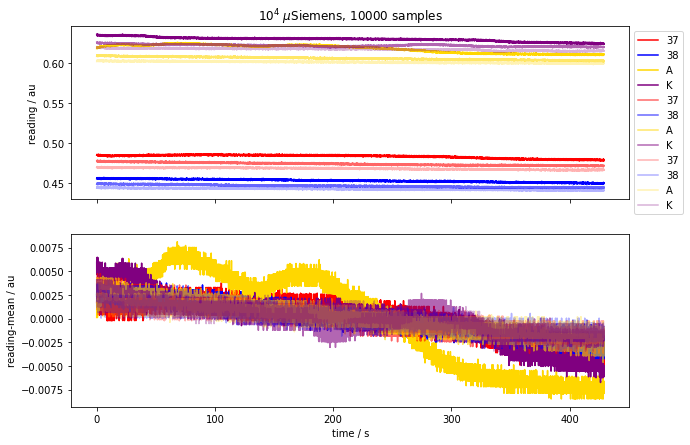

In [7]:
colors = ['red','blue','gold','purple',]
labels = np.array(['37', '38', 'A','K'])

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(10,7), sharex=True)

files = ['../labprobes_31jan19/4_probes_10000muSi_10000samp01_CH137_CH2K_CH338_CH4A.mat',
         '../labprobes_31jan19/4_probes_10000muSi_10000samp02_CH137_CH2K_CH338_CH4A.mat',
         '../labprobes_31jan19/4_probes_10000muSi_10000samp03_CH137_CH2K_CH338_CH4A.mat',
]

alphas = [1, 0.6, 0.3]

for file, alpha in zip(files,alphas):
    print(file)
    mat = sio.loadmat(file, squeeze_me=True)
    p37 = mat['ch1']
    pK = mat['ch2']
    p38 = mat['ch3']
    pA = mat['ch4']


    time = mat['time']
    nsamples = mat['nSamples']

    for probe, col, lab in zip([p37, p38, pA, pK], colors, labels):
        ax0.plot(time,probe, color=col, label=lab, alpha=alpha)
        ax1.plot(time,probe-np.mean(probe), color=col, label=lab, alpha=alpha)
        print('Probe %s, mean reading=%f' %(lab,np.mean(probe)) )

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax1.set_ylabel('reading-mean / au')
ax0.set_title('$10^4$ $\mu$Siemens, 10000 samples')
ax1.set_xlabel('time / s')

#### Some context... conductivity vs readings

The two standards I used have conductivities ($10^4$ $\mu$S, $10^5$ $\mu$S) equivalent to salinities of about 6 and 70 g/L, using the very sketchy formula 0.4665((cond in mSiemens/cm)^1.0878) = grams (of salt) per liter (of solution). (Valid at 25$^{\circ}$C, lab is at 20$^{\circ}$C).

Using the calculator in http://www.fivecreeks.org/monitor/sal.shtml, I get 6.3 ppt and over scale (max salinity that can be calulated with that formula is 42 ppt.)

Salinities in the lab should be between the range 6 and 70, given the readings from probe 37 when we calibrated using water from the buckets (readings were between 0.44 and 2.69).

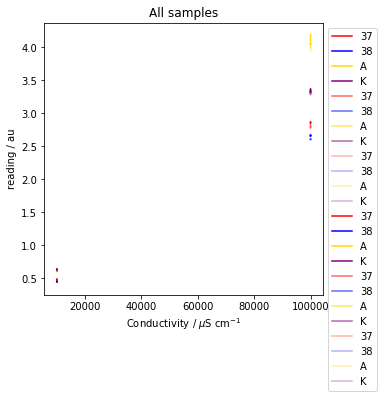

In [8]:
colors = ['red','blue','gold','purple',]
labels = np.array(['37', '38', 'A', 'K'])

fig, ax0 = plt.subplots(1,1, figsize=(5,5))

files = ['../labprobes_31jan19/4_probes_10000muSi_10000samp01_CH137_CH2K_CH338_CH4A.mat',
         '../labprobes_31jan19/4_probes_10000muSi_10000samp02_CH137_CH2K_CH338_CH4A.mat',
         '../labprobes_31jan19/4_probes_10000muSi_10000samp03_CH137_CH2K_CH338_CH4A.mat',
         '../labprobes_31jan19/4_probes_100000muSi_10000samp01_CH137_CH2K_CH338_CH4A.mat',
         '../labprobes_31jan19/4_probes_100000muSi_10000samp02_CH137_CH2K_CH338_CH4A.mat',
         '../labprobes_31jan19/4_probes_100000muSi_10000samp03_CH137_CH2K_CH338_CH4A.mat']

cond_standards = np.array([1E4,1E4,1E4,1E5,1E5,1E5])

alphas = [1, 0.6, 0.3, 1, 0.6, 0.3]

for file, alpha, cond in zip(files,alphas, cond_standards):
    mat = sio.loadmat(file, squeeze_me=True)
    p37 = mat['ch1']
    pK = mat['ch2']
    p38 = mat['ch3']
    pA = mat['ch4']

    time = mat['time']
    nsamples = mat['nSamples']

    for probe, col, lab in zip([p37, p38, pA, pK], colors, labels):
        ax0.plot(np.ones(np.shape(probe))*cond,probe, color=col, label=lab, alpha=alpha)
       
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_title('All samples')
ax0.set_xlabel('Conductivity / $\mu$S cm$^{-1}$')
plt.show()

In [9]:
((10)**1.0878)*0.4665

5.710204317712083

In [10]:
((100)**1.0878)*0.4665

69.89589142554709